# Business Case: A - Descriptive Statistics & Probability

### Defining Problem Statement 

#### Business Problem
* The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
1. Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
2. For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.

#### DataLink: https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv

#### Aerofit Dataset contains following attribute

* Product: Product Purchased KP281, KP481, or KP781
* Age: In years
* Gender: Male/Female
* Education: in years
* MaritalStatus: single or partnered
* Usage: average number of times the customer plans to use the treadmill each week
* Income: annual income (in $) 
* Fitness: self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the
excellent shape.
* Miles: average number of miles the customer expects to walk/run each week

#### Product Portfolio:
* The KP281 is an entry-level treadmill that sells for 1,500  dollar.
* The KP481 is for mid-level runners that sell for 1,750  dollar.
* The KP781 treadmill has advanced features that sell for 2,500 dollar.

#### Import the dataset and do usual data analysis steps like checking the structure & characteristics of the dataset

In [3]:
# loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading the data frame
aerofit = pd.read_csv(r'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv')

In [5]:
# checking the loaded dataframe with first few rows
aerofit.head() 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [6]:
#checking the loaded dataframe with last few rows
aerofit.tail() 

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120
179,KP781,48,Male,18,Partnered,4,5,95508,180


In [7]:
# checking the shape of the dataframe 
aerofit.shape

(180, 9)

In [8]:
# total no. of volume(elements)
aerofit.size 

1620

In [9]:
# checking the columns present in the dataframe
aerofit.columns.to_list()

['Product',
 'Age',
 'Gender',
 'Education',
 'MaritalStatus',
 'Usage',
 'Fitness',
 'Income',
 'Miles']

In [10]:
#length of dataframe
len(aerofit)

180

In [11]:
#checking datatypes
aerofit.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [12]:
#number of unique values in our data
aerofit.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [13]:
#This method prints information about the DataFrame including the index dtype and columns, non-null values and memory usage
aerofit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [14]:
aerofit.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


### Analysing basic metrics

**Observation**
##### Product:
- There are three distinct products in the dataframe.
- product with most frequency is KP281.
##### Age:
- Minimum age of the person is 18 & Maximum 50.
- Average is 28.79 and 75% of persons have age less than or equal to 33 and 25% of persons have   age less than or equal 24
##### Gender:
- Out of 180 data, 104 are Male and rest 76 are the female.(as only two unique gender is given male and female)
##### Education:
- Most of the people are having 16 years of education i.e. 75% of persons are having education equal to or less       than 16 years.
##### MaritalStatus:
- Out of 180 data, 107 are Partnered and rest 73 are the single.(as only two unique gender is given Partnered and Single)
##### Usage:
- 75% of people prefers to use tredmil 4 or less than 4 times a week
##### Fitness
- 75% of people selfrated as 4 or less than 4 in fitness
##### Income(in$):
- Min is 29562.
- Max is 104581
- std is 16506.684226 (very high). There is posibility of Outliers
##### Miles:
- 75% of people run or walk less or equal to 114km per week
- std is 16506.684226 (very high). There is posibility of Outliers

### Missing value Detection 

In [15]:
aerofit.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observation**
- There is no missing values in the given Aerofit dataset.

#### Detect Outliers (using boxplot, “describe” method by checking the difference between mean and median)

### Outlier Detection Through Boxplot

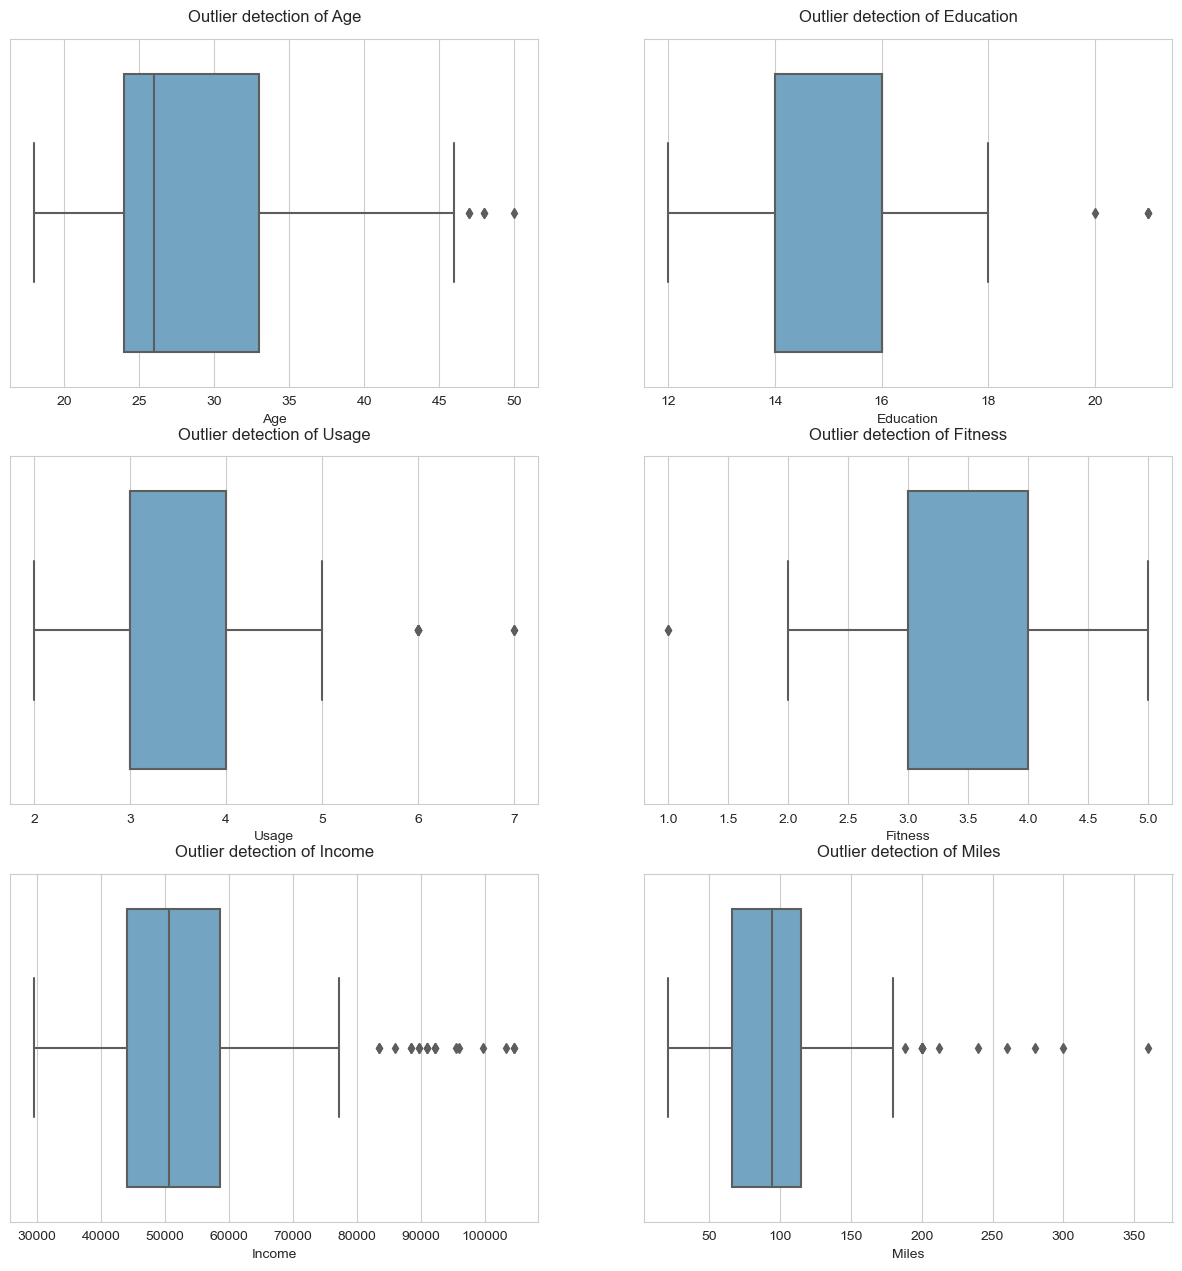

In [57]:
sns.set_style(style='whitegrid')
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axis = plt.subplots(3,2,figsize=(15, 7))
fig.subplots_adjust(top=1.8)
count=0
for i in range(3):
    for j in range(2):
        sns.boxplot(data=aerofit,x=attributes[count],orient='h',ax=axis[i,j],palette='PuBuGn')
        axis[i,j].set_title(f"Outlier detection of {attributes[count]}", pad=12, fontsize=12)
        count += 1
plt.show()

**Observation**
###### In Areofit DataFrame:
- Income and Miles are having more outliers.
- Age, Education and Usage are having very less outliers.

### Outlier Detection Through Describe method

In [52]:
aerofit.describe(include="all")

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**Observation**
* Age
 - Mean is 28.78 and median is 26 so there is some number of outliers.
* Education
 - Mean is 15.5 and median is 16 so there is very less number of outliers.
* Usage 
 - Mean is 3,45 and median is 3 so there is very less number of outliers.
* Fitness 
 - Mean is 3,31 and median is 3 so there is very few outliers.
* Income 
 - 53719.57 is the mean and median is 50596.50. mean is comparatively much hier than the median.
 - it is possiblity of high number of outliers
* Miles
 - 103.19 is the mean and median is 94.00. mean is comparatively much hier than the median.
 - it is possiblity of high number of outliers


### Non-Graphical Analysis: Value counts and unique 

In [17]:
# cheking for product
aerofit['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [18]:
aerofit['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

**Observation**
- There are three distict type of product
- KP281 is the most used and KP781 is the least used
   

In [19]:
# cheking for age
aerofit['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [20]:
aerofit['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

**Observation**
- 18 to 42 age group customers are present
- Maximum customers fall in the 20-35 age group

In [21]:
# cheking for Gender
aerofit['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [22]:
aerofit['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

**Observation**
- Two types of gender customers present male and female
- male customer is higer than female

In [23]:
# cheking for Education
aerofit['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [24]:
aerofit['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

**Observation**
- Most of the customers have 16 yers of education and least is 1 year

In [25]:
# cheking for MaritalStatus
aerofit['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [26]:
aerofit['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

**Observation**
- Most of the customers have maratial status as Partnered but singles counts are also impactful

In [27]:
# cheking for Usage
aerofit['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [28]:
aerofit['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

**Observation**
- Maximum number of customers decided to use 2-4 times per week

In [29]:
# cheking for Fitness
aerofit['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [30]:
aerofit['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

**Observation**
- Maximum number of customers self-rated fitness as 3
- Considerable number of customers self-rated fitness between 2-4
- least self-rated is 1

In [31]:
# cheking for Income
aerofit['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [32]:
# cheking for Income
aerofit['Income'].max()

104581

In [33]:
# cheking for Income
aerofit['Income'].min()

29562

**Observation**
- customers income range is between 29562 to 104581 in dollar($)

In [34]:
# cheking for Miles
aerofit['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [35]:
# cheking for Miles
aerofit['Miles'].min()

21

In [36]:
# cheking for Miles
aerofit['Miles'].max()

360

**Observation**
- customers have decided differt miles(in km) per week as per their convinience
- The range is 21 to 360

### Data Distribution for the numeric attributes(Univariant)

In [1]:
sns.set_style(style='whitegrid')
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig, axis = plt.subplots(3,2,figsize=(15, 12))
fig.subplots_adjust(top=1.5)
count=0


NameError: name 'sns' is not defined

**Observation**
##### Age:
- Highest customers falls into the 20-50 age category. We can see the count of  at 25 and 26
### Education:
- Highest of the customers are having 16 years of education.
### Usages:
- Highest of the customers have decided to use the trendmil threeice a week.
##### Fitness
- Highest of the customers have rated themselves 3 in fitness.
##### Income(in$):
- Highest of the people income falls into 50000-60000 dollar.
##### Miles:
- Highest customers decided to walk or run 114 km per week

###  Data distribution categorical attributes(Univariant)

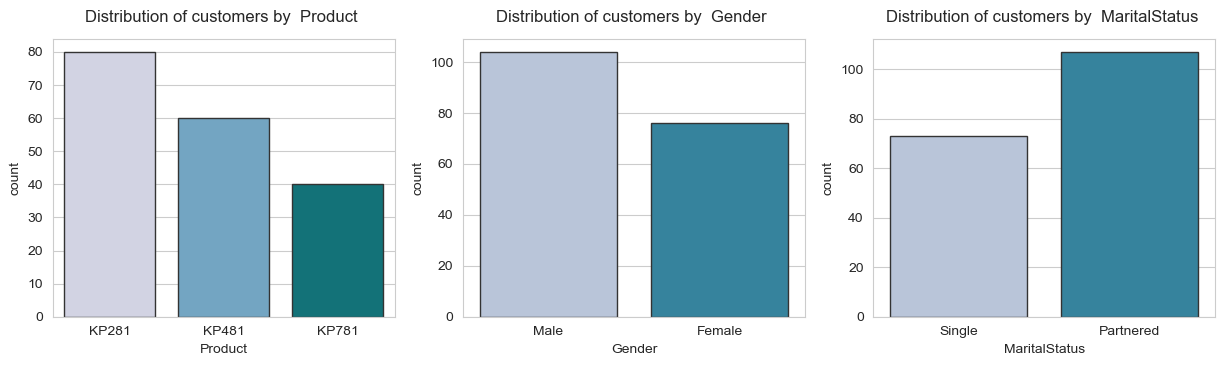

In [70]:
sns.set_style(style='whitegrid')
attributes = ['Gender', 'Occupation','City_Category','Marital_Status','Product_Category']
fig, axis = plt.subplots(2,2,figsize=(16, 12))
fig.subplots_adjust(top=1.5)
count=0
for i in range(3):
        sns.countplot(data=aerofit,x=attributes[count],ax=axis[i],edgecolor="0.20",palette='PuBuGn')
        axis[i].set_title(f"Distribution of customers by  {attributes[count]} ", pad=12, fontsize=12)
        count += 1
plt.show()

**Observation**
##### Product:
- There are three distinct products in the dataframe.
- product with most used by customer is KP281.
- least used product is KP781
##### Gender:
- count of Male customers is more than female customers.
##### MaritalStatus:
- count of Partnered customers are more than single customers


In [39]:
productdf = aerofit['Product'].value_counts().reset_index()
productdf.rename(columns = {'Product':'count of product'},inplace=True)
productdf["product in %"] = (productdf['count of product']/len(aerofit['Product']))*100
productdf

,index,count of product,product in %
0,KP281,80,44.444444
1,KP481,60,33.333333
2,KP781,40,22.222222


In [40]:
Genderdf = aerofit['Gender'].value_counts().reset_index()
Genderdf.rename(columns = {'Gender':'count of Gender'},inplace=True)
Genderdf["Gender in %"] = (Genderdf['count of Gender']/len(aerofit['Gender']))*100
Genderdf

,index,count of Gender,Gender in %
0,Male,104,57.777778
1,Female,76,42.222222


In [41]:
MaritalStatusdf = aerofit['MaritalStatus'].value_counts().reset_index()
MaritalStatusdf.rename(columns = {'MaritalStatus':'count of MaritalStatus'},inplace=True)
MaritalStatusdf["MaritalStatus in %"] = (MaritalStatusdf['count of MaritalStatus']/len(aerofit['Gender']))*100
MaritalStatusdf

,index,count of MaritalStatus,MaritalStatus in %
0,Partnered,107,59.444444
1,Single,73,40.555556


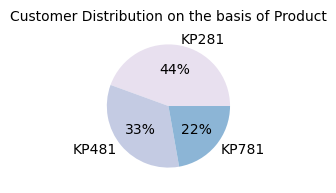

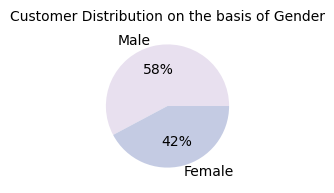

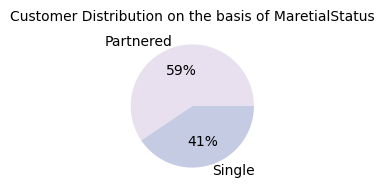

In [42]:
figure,axis = plt.subplots(1, 1, figsize=(18,2))
palette_color = sns.color_palette('PuBuGn')
plt.title('Customer Distribution on the basis of Product',fontsize=10)
plt.pie(productdf['count of product'], labels=productdf['index'],autopct='%.0f%%',colors=palette_color)

figure,axis = plt.subplots(1, 1, figsize=(18,2))
plt.title('Customer Distribution on the basis of Gender',fontsize=10)
plt.pie(Genderdf['count of Gender'], labels=Genderdf['index'],autopct='%.0f%%',colors=palette_color)


figure,axis = plt.subplots(1, 1, figsize=(18,2))
plt.title('Customer Distribution on the basis of MaretialStatus',fontsize=10)
plt.pie(MaritalStatusdf['count of MaritalStatus'], labels=MaritalStatusdf['index'],autopct='%.0f%%',colors=palette_color)

plt.show()

**Observation**
- Product:
- KP281 is used by 44 % of customers approx.
- KP481 is used by 33 % of customers approx.
- KP781 is used by 22 % of customers approx.
- Gender:
- 58% of customers are male
- 42% of cusomers are female
- MaretialStatus:
- 59% of customers are partnered
- 41% of customers are single

#### Check if features like marital status, age have any effect on the product purchased.

# Bivariate Analysis

### Gender and MaritalStatus effect on the product . (categorical-Categorical)

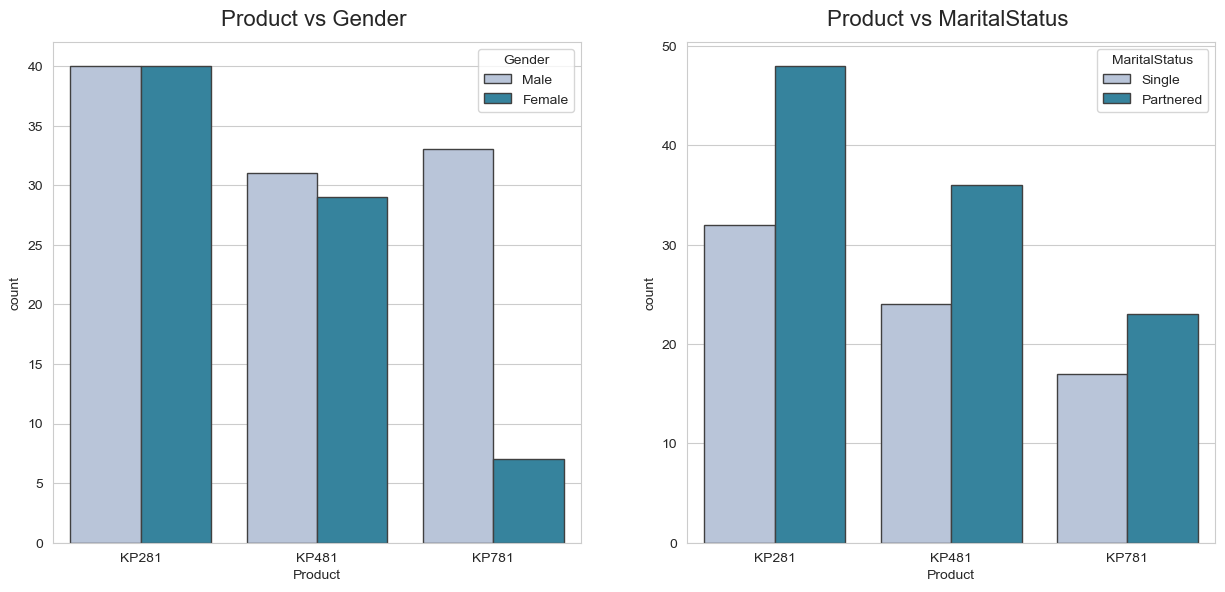

In [84]:
attributes = ['Gender','MaritalStatus']
fig.subplots_adjust(top=1.5)
fig, axis = plt.subplots(1,2,figsize=(15, 6.5))
count = 0
for i in range(2):
        sns.countplot(data=aerofit, x='Product',hue=attributes[count], ax=axis[i],edgecolor='0.25',palette='PuBuGn')
        axis[i].set_title(f"Product vs {attributes[count]} ", pad=12, fontsize=16)
        count +=1

**Observation**
###### Product vs Gender:
- KP281:
- same number of male and female purchased.
- KP481:
- There is a minor difference between male and female customers
- KP781:
- There is a huge difference between the male and female customers
- more male customer has purchased
###### Product vs Marital Status:
- In all three category of product, partnered customers is more than the single.

### Age, Education, Usage, Fitness, Income, Miles effect on the product . (categorical-Numerical)

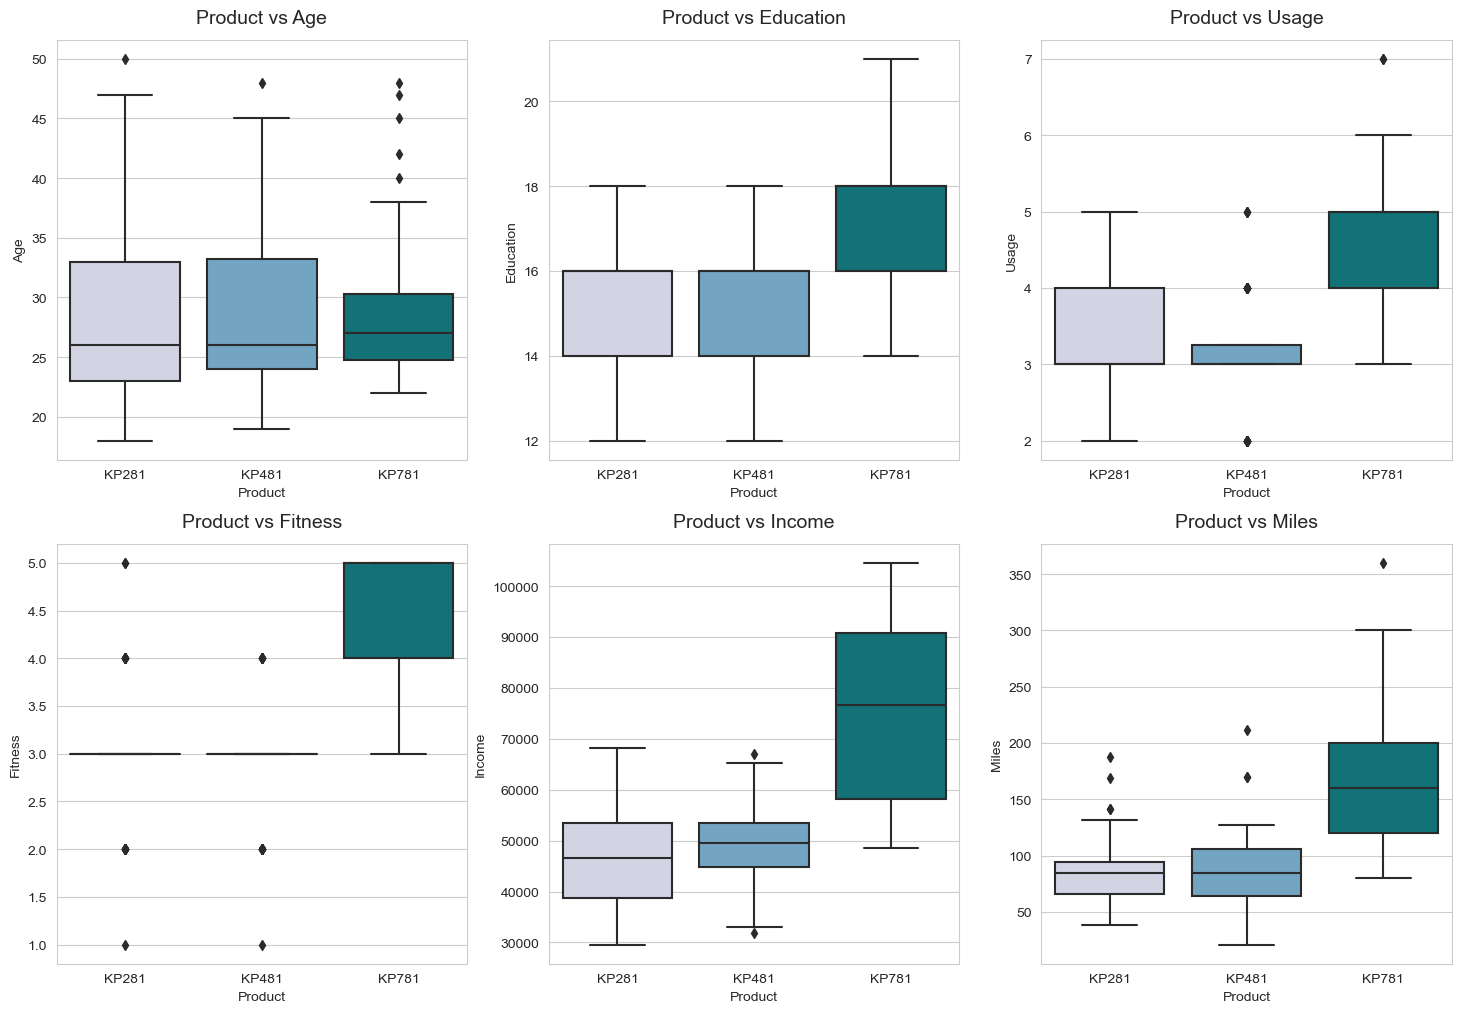

In [80]:
attributes = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']
fig.subplots_adjust(top=1.5)
fig, axis = plt.subplots(2, 3, figsize=(18, 12))
count = 0
for i in range(2):
    for j in range(3):
        sns.boxplot(data=aerofit, x='Product', y=attributes[count], ax=axis[i,j], palette='PuBuGn')
        axis[i,j].set_title(f"Product vs {attributes[count]}", pad=12, fontsize=14)
        count += 1

**Observation**
###### Product Vs Age:
* The age range of customer purchased KP281 and KP481 is between 23 to 33 and both have the same median value
* Customer purchased KP781 has the age range 25-30. we can see more outlier here.
###### Product Vs Education:
* customers having 14 to 16 years of education have purchased KP281 and  KP481.
* customers having more than 16 years of education have purchased KP781 and  KP481.
###### Product Vs Usages:
* some customes who has decided to run 3 to 4 times have purchased KP281 and KP481.
* customers who have decided to walk/run 4 or more than 4 times per week has purchased KP781.
###### Product Vs Fitness:
* customers who have selfrated 4 or more has purchased KP781.
###### Product Vs Income:
* customer having income between 40,000 to 55,000 (in dollar) have purchased KP281.
* some customers haveing income between 45000 to 55000 (in dollar) have purchased KP481
###### Product Vs Miles:
* customers who have decided to run 70 miles to 90 mile per week has purchased KP281.
* some customers who have decided to run 60 miles to 120 mile per week has purchased KP481.
* customers who have decide to run more than 120 mile per week has purchased KP781.

#### Check correlation among different factors using heat maps and pair plots.

In [44]:
aerofit.corr()

/var/folders/57/m5hgcgf93mq4vlk6xhlrjy7r0000gn/T/ipykernel_2226/1840836322.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  aerofit.corr()


,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


/var/folders/57/m5hgcgf93mq4vlk6xhlrjy7r0000gn/T/ipykernel_2226/3147371616.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(aerofit.corr(),annot=True)


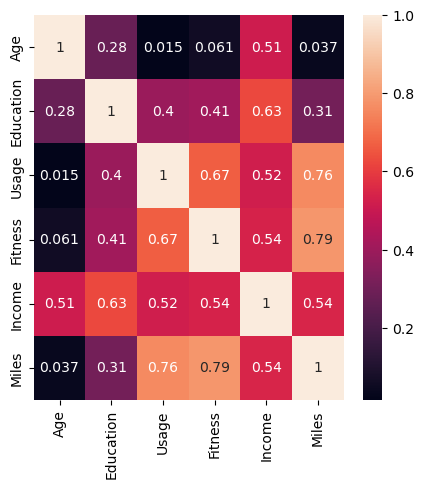

In [50]:
plt.subplots(figsize=(5,5)) 
sns.heatmap(aerofit.corr(),annot=True) 
plt.show()

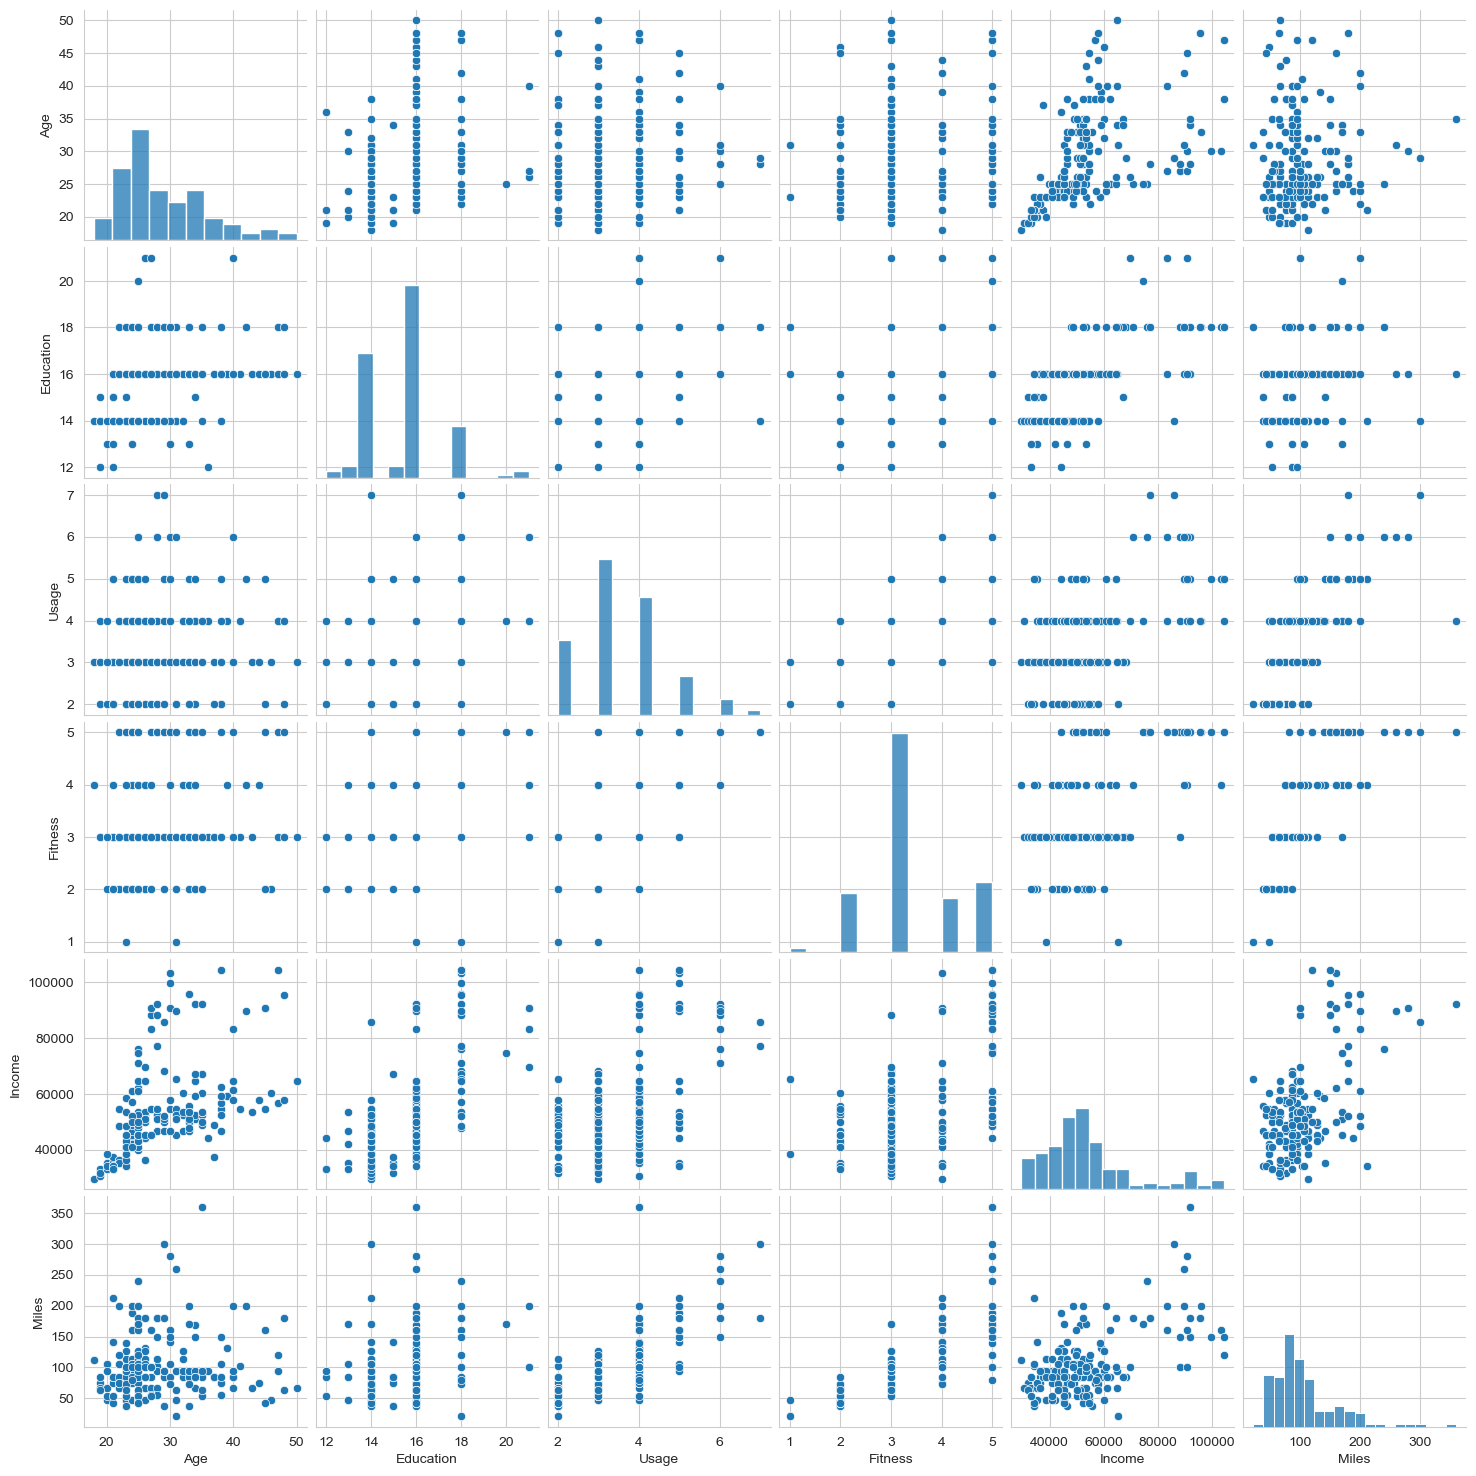

In [58]:
sns.set_style(style='whitegrid')
sns.pairplot(data=aerofit) 
plt.show()

**ObserVation**
- This provides the relationship between differen categorical attributes with each other.

# For each AeroFit treadmill product, construct two-way contingency tables 

##### Product with respect to Gender:

In [85]:
product_gender_df = pd.crosstab(index=aerofit['Gender'], columns=[aerofit['Product']])
product_gender_df

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


##### Product with respect to MaritalStatus:

In [87]:
product_ms_df = pd.crosstab(index=aerofit['MaritalStatus'], columns=[aerofit['Product']])
product_ms_df

Product,KP281,KP481,KP781
MaritalStatus,,,
Partnered,48,36,23
Single,32,24,17


##### Product with respect to Usage:

In [89]:
product_usage_df = pd.crosstab(index=aerofit['Usage'], columns=[aerofit['Product']])
product_usage_df

Product,KP281,KP481,KP781
Usage,,,
2,19,14,0
3,37,31,1
4,22,12,18
5,2,3,12
6,0,0,7
7,0,0,2


##### Product with respect to Fitness:

In [90]:
product_fitness_df = pd.crosstab(index=aerofit['Fitness'], columns=[aerofit['Product']])
product_fitness_df

Product,KP281,KP481,KP781
Fitness,,,
1,1,1,0
2,14,12,0
3,54,39,4
4,9,8,7
5,2,0,29


##### Product with respect to Education:

In [146]:
product_edu_df = pd.crosstab(index=aerofit['Education'], columns=[aerofit['Product']])
product_edu_df

Product,KP281,KP481,KP781
Education,,,
12,2,1,0
13,3,2,0
14,30,23,2
15,4,1,0
16,39,31,15
18,2,2,19
20,0,0,1
21,0,0,3


# Calculation of Marginal , Conditional  Probabilities

###### Calculate the Marginal probability of different types of Gender for three types of product ? 
###### Calculate the  probability of three types of product when the gender is konwn (conditional Probability)

In [112]:
def p_prod_given_gender(gender, print_marginal=False):
    
    p_781 = product_gender_df['KP781'][gender] / product_gender_df.loc[gender].sum()
    p_481 = product_gender_df['KP481'][gender] / product_gender_df.loc[gender].sum()
    p_281 = product_gender_df['KP281'][gender] / product_gender_df.loc[gender].sum()
    
    if print_marginal:
        print("Marginal probability for different type of Gender are below:")
        print("\n")
        print(f"P(Male): {product_gender_df.loc['Male'].sum()/len(aerofit):.2f}")
        print(f"P(Female): {product_gender_df.loc['Female'].sum()/len(aerofit):.2f}\n")
    print("\n")
    print(f"Conditional probability for different type of product in given gender is {gender} below:")
    print("\n")
    print(f"P(KP781|{gender}): {p_781:.2f}")
    print(f"P(KP481|{gender}): {p_481:.2f}")
    print(f"P(KP281|{gender}): {p_281:.2f}\n")
    
p_prod_given_gender('Male', True)
p_prod_given_gender('Female')

Marginal probability for different type of Gender are below:


P(Male): 0.58
P(Female): 0.42



Conditional probability for different type of product in given gender is Male below:


P(KP781|Male): 0.32
P(KP481|Male): 0.30
P(KP281|Male): 0.38



Conditional probability for different type of product in given gender is Female below:


P(KP781|Female): 0.09
P(KP481|Female): 0.38
P(KP281|Female): 0.53



###### Calculate the Marginal probability of different types of Marital Status for three types of product ? 
###### Calculate the  probability of three types of product when the Marital Status is konwn (conditional Probability)

In [120]:
def p_prod_given_mstatus(status, print_marginal=False):
    
    p_781 = product_ms_df['KP781'][status] / product_ms_df.loc[status].sum()
    p_481 = product_ms_df['KP481'][status] / product_ms_df.loc[status].sum()
    p_281 = product_ms_df['KP281'][status] / product_ms_df.loc[status].sum()
    
    if print_marginal:
        print("Marginal probability for different type of marital status are below:")
        print("\n")
        print(f"P(Single): {product_ms_df.loc['Single'].sum()/len(aerofit):.2f}")
        print(f"P(Partnered): {product_ms_df.loc['Partnered'].sum()/len(aerofit):.2f}\n")
    print("\n")
    print(f"Conditional probability for different type of product in given maritalstatus is {status} below:")
    print("\n")
    print(f"P(KP781|{status}): {p_781:.2f}")
    print(f"P(KP481|{status}): {p_481:.2f}")
    print(f"P(KP281|{status}): {p_281:.2f}\n")
    
p_prod_given_mstatus('Single', True)
p_prod_given_mstatus('Partnered')


Marginal probability for different type of marital status are below:


P(Single): 0.41
P(Partnered): 0.59



Conditional probability for different type of product in given maritalstatus is Single below:


P(KP781|Single): 0.23
P(KP481|Single): 0.33
P(KP281|Single): 0.44



Conditional probability for different type of product in given maritalstatus is Partnered below:


P(KP781|Partnered): 0.21
P(KP481|Partnered): 0.34
P(KP281|Partnered): 0.45



###### Calculate the Marginal probability of different types of usage for three types of product ? 
###### Calculate the  probability of three types of product when the usage is konwn (conditional Probability)

In [128]:
def p_prod_given_usage(usage, print_marginal=False):
    
    p_781 = product_usage_df['KP781'][usage] / product_usage_df.loc[usage].sum()
    p_481 = product_usage_df['KP481'][usage] / product_usage_df.loc[usage].sum()
    p_281 = product_usage_df['KP281'][usage] / product_usage_df.loc[usage].sum()
    
    if print_marginal:
        print("Marginal probability for different type of marital status are below:")
        print("\n")
        print(f"P(2): {product_usage_df.loc[2].sum()/len(aerofit):.2f}")
        print(f"P(3): {product_usage_df.loc[3].sum()/len(aerofit):.2f}\n")
        print(f"P(4): {product_usage_df.loc[4].sum()/len(aerofit):.2f}")
        print(f"P(5): {product_usage_df.loc[5].sum()/len(aerofit):.2f}\n")
        print(f"P(6): {product_usage_df.loc[6].sum()/len(aerofit):.2f}")
        print(f"P(7): {product_usage_df.loc[7].sum()/len(aerofit):.2f}\n")
    print("\n")
    print(f"Conditional probability for different type of product given that customer have decided usages per week is {usage} below:")
    print("\n")
    print(f"P(KP781|{usage}): {p_781:.2f}")
    print(f"P(KP481|{usage}): {p_481:.2f}")
    print(f"P(KP281|{usage}): {p_281:.2f}\n")
    
p_prod_given_usage(2,True)
p_prod_given_usage(3)
p_prod_given_usage(4)
p_prod_given_usage(5)
p_prod_given_usage(6)
p_prod_given_usage(7)

Marginal probability for different type of marital status are below:


P(2): 0.18
P(3): 0.38

P(4): 0.29
P(5): 0.09

P(6): 0.04
P(7): 0.01



Conditional probability for different type of product given that customer have decided usages per week is 2 below:


P(KP781|2): 0.00
P(KP481|2): 0.42
P(KP281|2): 0.58



Conditional probability for different type of product given that customer have decided usages per week is 3 below:


P(KP781|3): 0.01
P(KP481|3): 0.45
P(KP281|3): 0.54



Conditional probability for different type of product given that customer have decided usages per week is 4 below:


P(KP781|4): 0.35
P(KP481|4): 0.23
P(KP281|4): 0.42



Conditional probability for different type of product given that customer have decided usages per week is 5 below:


P(KP781|5): 0.71
P(KP481|5): 0.18
P(KP281|5): 0.12



Conditional probability for different type of product given that customer have decided usages per week is 6 below:


P(KP781|6): 1.00
P(KP481|6): 0.00
P(KP281|6): 0.00



Con

###### Calculate the Marginal probability of different types of fitness for three types of product ? 
###### Calculate the  probability of three types of product when the fitness is konwn (conditional Probability)?

In [151]:
def p_prod_given_fitness(fitness, print_marginal=False):
    
    p_781 = product_fitness_df['KP781'][fitness] / product_fitness_df.loc[fitness].sum()
    p_481 = product_fitness_df['KP481'][fitness] / product_fitness_df.loc[fitness].sum()
    p_281 = product_fitness_df['KP281'][fitness] / product_fitness_df.loc[fitness].sum()
    
    if print_marginal:
        print("Marginal probability for different type of fitness are below:")
        print("\n")
        print(f"P(1): {product_fitness_df.loc[1].sum()/len(aerofit):.2f}")
        print(f"P(2): {product_fitness_df.loc[2].sum()/len(aerofit):.2f}\n")
        print(f"P(3): {product_fitness_df.loc[3].sum()/len(aerofit):.2f}")
        print(f"P(4): {product_fitness_df.loc[4].sum()/len(aerofit):.2f}\n")
        print(f"P(5): {product_fitness_df.loc[5].sum()/len(aerofit):.2f}")
    print("\n")
    print(f"Conditional probability for different type of product given that customer have rated fitness  is {fitness} below:")
    print("\n")
    print(f"P(KP781|{fitness}): {p_781:.2f}")
    print(f"P(KP481|{fitness}): {p_481:.2f}")
    print(f"P(KP281|{fitness}): {p_281:.2f}\n")
    
p_prod_given_fitness(1,True)
p_prod_given_fitness(2)
p_prod_given_fitness(3)
p_prod_given_fitness(4)
p_prod_given_fitness(5)

Marginal probability for different type of fitness are below:


P(1): 0.01
P(2): 0.14

P(3): 0.54
P(4): 0.13

P(5): 0.17


Conditional probability for different type of product given that customer have rated fitness  is 1 below:


P(KP781|1): 0.00
P(KP481|1): 0.50
P(KP281|1): 0.50



Conditional probability for different type of product given that customer have rated fitness  is 2 below:


P(KP781|2): 0.00
P(KP481|2): 0.46
P(KP281|2): 0.54



Conditional probability for different type of product given that customer have rated fitness  is 3 below:


P(KP781|3): 0.04
P(KP481|3): 0.40
P(KP281|3): 0.56



Conditional probability for different type of product given that customer have rated fitness  is 4 below:


P(KP781|4): 0.29
P(KP481|4): 0.33
P(KP281|4): 0.38



Conditional probability for different type of product given that customer have rated fitness  is 5 below:


P(KP781|5): 0.94
P(KP481|5): 0.00
P(KP281|5): 0.06



###### Calculate the Marginal probability of different types of education for three types of product ? 
###### Calculate the  probability of three types of product when the education is konwn (conditional Probability)?

In [154]:
def p_prod_given_edu(edu, print_marginal=False):
    
    p_781 = product_edu_df['KP781'][edu] / product_edu_df.loc[edu].sum()
    p_481 = product_edu_df['KP481'][edu] / product_edu_df.loc[edu].sum()
    p_281 = product_edu_df['KP281'][edu] / product_edu_df.loc[edu].sum()
    
    if print_marginal:
        print("Marginal probability for different type of Education are below:")
        print("\n")
        print(f"P(12): {product_edu_df.loc[12].sum()/len(aerofit):.2f}")
        print(f"P(13): {product_edu_df.loc[13].sum()/len(aerofit):.2f}\n")
        print(f"P(14): {product_edu_df.loc[14].sum()/len(aerofit):.2f}")
        print(f"P(15): {product_edu_df.loc[15].sum()/len(aerofit):.2f}\n")
        print(f"P(16): {product_edu_df.loc[16].sum()/len(aerofit):.2f}")
        print(f"P(18): {product_edu_df.loc[18].sum()/len(aerofit):.2f}")
        print(f"P(20): {product_edu_df.loc[20].sum()/len(aerofit):.2f}")
        print(f"P(21): {product_edu_df.loc[21].sum()/len(aerofit):.2f}")
    print("\n")
    print(f"Conditional probability for different type of product given that customer Education  is {edu} below:")
    print("\n")
    print(f"P(KP781|{edu}): {p_781:.2f}")
    print(f"P(KP481|{edu}): {p_481:.2f}")
    print(f"P(KP281|{edu}): {p_281:.2f}\n")
    
p_prod_given_edu(12,True)
p_prod_given_edu(13)
p_prod_given_edu(14)
p_prod_given_edu(15)
p_prod_given_edu(16)
p_prod_given_edu(18)
p_prod_given_edu(20)
p_prod_given_edu(21)

Marginal probability for different type of Education are below:


P(12): 0.02
P(13): 0.03

P(14): 0.31
P(15): 0.03

P(16): 0.47
P(18): 0.13
P(20): 0.01
P(21): 0.02


Conditional probability for different type of product given that customer Education  is 12 below:


P(KP781|12): 0.00
P(KP481|12): 0.33
P(KP281|12): 0.67



Conditional probability for different type of product given that customer Education  is 13 below:


P(KP781|13): 0.00
P(KP481|13): 0.40
P(KP281|13): 0.60



Conditional probability for different type of product given that customer Education  is 14 below:


P(KP781|14): 0.04
P(KP481|14): 0.42
P(KP281|14): 0.55



Conditional probability for different type of product given that customer Education  is 15 below:


P(KP781|15): 0.00
P(KP481|15): 0.20
P(KP281|15): 0.80



Conditional probability for different type of product given that customer Education  is 16 below:


P(KP781|16): 0.18
P(KP481|16): 0.36
P(KP281|16): 0.46



Conditional probability for different type of pro

###### Calculate the Marginal probability of different types of age range  for three types of product ? 
###### Calculate the  probability of three types of product when the age between 25-30 is konwn (conditional Probability)?

In [260]:
# lets add a column mile_range and devide income in three category high,medium and low
Age_range=[]
for i in  aerofit["Age"]:
    if i < 35:
        Age_range.append('Young')
    elif i >=50:
        Age_range.append('Old')
    else:
        Age_range.append('Middle')
    
  
aerofit["Age_range"]= Age_range

In [261]:
product_age_df = pd.crosstab(index=aerofit['Age_range'], columns=[aerofit['Product']])
product_age_df

Product,KP281,KP481,KP781
Age_range,,,
Middle,16,12,7
Old,1,0,0
Young,63,48,33


In [265]:
def p_prod_given_age(age, print_marginal=False):
    
    p_781 = product_age_df['KP781'][age] / product_age_df.loc[age].sum()
    p_481 = product_age_df['KP481'][age] / product_age_df.loc[age].sum()
    p_281 = product_age_df['KP281'][age] / product_age_df.loc[age].sum()
    
    if print_marginal:
        print("Marginal probability for different type of age are below:")
        print("\n")
        print(f"P(Young): {product_age_df.loc['Young'].sum()/len(aerofit):.2f}")
        print(f"P(Old): {product_age_df.loc['Old'].sum()/len(aerofit):.2f}\n")
        print(f"P(Middle): {product_age_df.loc['Middle'].sum()/len(aerofit):.2f}")
    print("\n")
    print(f"Conditional probability for different type of product given that customer age is {age} below:")
    print("\n")
    print(f"P(KP781|{age}): {p_781:.2f}")
    print(f"P(KP481|{age}): {p_481:.2f}")
    print(f"P(KP281|{age}): {p_281:.2f}\n")
    
p_prod_given_age("Young",True)
p_prod_given_age("Old")
p_prod_given_age("Middle")

Marginal probability for different type of age are below:


P(Young): 0.80
P(Old): 0.01

P(Middle): 0.19


Conditional probability for different type of product given that customer age is Young below:


P(KP781|Young): 0.23
P(KP481|Young): 0.33
P(KP281|Young): 0.44



Conditional probability for different type of product given that customer age is Old below:


P(KP781|Old): 0.00
P(KP481|Old): 0.00
P(KP281|Old): 1.00



Conditional probability for different type of product given that customer age is Middle below:


P(KP781|Middle): 0.20
P(KP481|Middle): 0.34
P(KP281|Middle): 0.46



###### Calculate the Marginal probability of different types of miles range  for three types of product ? 
###### Calculate the  probability of three types of product when the miles range  per week decided by customer  is konwn (conditional Probability)?

In [249]:
# lets add a column mile_range and devide income in three category high,medium and low
Mile_range=[]
for i in  aerofit["Miles"]:
    if i < 80:
        Mile_range.append('Low')
    elif i >=120:
        Mile_range.append('High')
    else:
        Mile_range.append('Medium')
    
  
aerofit["Mile_range"]= Mile_range


In [250]:
product_mr_df = pd.crosstab(index=aerofit['Mile_range'], columns=[aerofit['Product']])
product_mr_df

Product,KP281,KP481,KP781
Mile_range,,,
High,6,8,31
Low,38,21,0
Medium,36,31,9


In [251]:
def p_prod_given_mile_range(mr, print_marginal=False):
    
    p_781 = product_mr_df['KP781'][mr] / product_mr_df.loc[mr].sum()
    p_481 = product_mr_df['KP481'][mr] / product_mr_df.loc[mr].sum()
    p_281 = product_mr_df['KP281'][mr] / product_mr_df.loc[mr].sum()
    
    if print_marginal:
        print("Marginal probability for different type of marital status are below:")
        print("\n")
        print(f"P(High): {product_mr_df.loc['High'].sum()/len(aerofit):.2f}")
        print(f"P(Medium): {product_mr_df.loc['Medium'].sum()/len(aerofit):.2f}")
        print(f"P(Low): {product_mr_df.loc['Low'].sum()/len(aerofit):.2f}\n")
    print("\n")
    print(f"Conditional probability for different type of product in given maritalstatus is {mr} below:")
    print("\n")
    print(f"P(KP781|{mr}): {p_781:.2f}")
    print(f"P(KP481|{mr}): {p_481:.2f}")
    print(f"P(KP281|{mr}): {p_281:.2f}\n")
    
p_prod_given_mile_range('High', True)
p_prod_given_mile_range('Medium')
p_prod_given_mile_range('Low')

Marginal probability for different type of marital status are below:


P(High): 0.25
P(Medium): 0.42
P(Low): 0.33



Conditional probability for different type of product in given maritalstatus is High below:


P(KP781|High): 0.69
P(KP481|High): 0.18
P(KP281|High): 0.13



Conditional probability for different type of product in given maritalstatus is Medium below:


P(KP781|Medium): 0.12
P(KP481|Medium): 0.41
P(KP281|Medium): 0.47



Conditional probability for different type of product in given maritalstatus is Low below:


P(KP781|Low): 0.00
P(KP481|Low): 0.36
P(KP281|Low): 0.64



###### Calculate the Marginal probability of different types of income range  for three types of product ? 
###### Calculate the  probability of three types of product when the ncome range  per week decided by customer  is konwn (conditional Probability)?

In [237]:
# lets add a column income_range and devide income in three category high,medium and low
income_range=[]
for i in  aerofit["Income"]:
    if i < 40000:
        income_range.append('Low')
    elif i >70000:
        income_range.append('High')
    else:
        income_range.append('Medium')
    
  
aerofit["Income_range"]= income_range


In [239]:
product_ir_df = pd.crosstab(index=aerofit['Income_range'], columns=[aerofit['Product']])
product_ir_df

Product,KP281,KP481,KP781
Income_range,,,
High,0,0,23
Low,23,9,0
Medium,57,51,17


In [240]:
def p_prod_given_income_range(ir, print_marginal=False):
    
    p_781 = product_ir_df['KP781'][ir] / product_ir_df.loc[ir].sum()
    p_481 = product_ir_df['KP481'][ir] / product_ir_df.loc[ir].sum()
    p_281 = product_ir_df['KP281'][ir] / product_ir_df.loc[ir].sum()
    
    if print_marginal:
        print("Marginal probability for different type of marital status are below:")
        print("\n")
        print(f"P(High): {product_ir_df.loc['High'].sum()/len(aerofit):.2f}")
        print(f"P(Medium): {product_ir_df.loc['Medium'].sum()/len(aerofit):.2f}")
        print(f"P(Low): {product_ir_df.loc['Low'].sum()/len(aerofit):.2f}\n")
    print("\n")
    print(f"Conditional probability for different type of product in given maritalstatus is {ir} below:")
    print("\n")
    print(f"P(KP781|{ir}): {p_781:.2f}")
    print(f"P(KP481|{ir}): {p_481:.2f}")
    print(f"P(KP281|{ir}): {p_281:.2f}\n")
    
p_prod_given_income_range('High', True)
p_prod_given_income_range('Medium')
p_prod_given_income_range('Low')

Marginal probability for different type of marital status are below:


P(High): 0.13
P(Medium): 0.69
P(Low): 0.18



Conditional probability for different type of product in given maritalstatus is High below:


P(KP781|High): 1.00
P(KP481|High): 0.00
P(KP281|High): 0.00



Conditional probability for different type of product in given maritalstatus is Medium below:


P(KP781|Medium): 0.14
P(KP481|Medium): 0.41
P(KP281|Medium): 0.46



Conditional probability for different type of product in given maritalstatus is Low below:


P(KP781|Low): 0.00
P(KP481|Low): 0.28
P(KP281|Low): 0.72



# Customer Profiling 

###### Based on Gender:
* Probability of customer being male is 0.58 and Female are 0.42 respectively.
* Given that customer is Male and buying KP781,KP481,KP281 are 0.32, 0.30,0.38 respectively.
* Given that customer is Female and buying KP781,KP481,KP281 are 0.09, 0.38,0.53 respectively.
###### Based on Marital Status:
* Probability of customer being partnered is 0.41 and single are 0.59 respectively.
* Given that customer is partnered and buying KP781,KP481,KP281 are 0.23, 0.33,0.44 respectively.
* Given that customer is Female and buying KP781,KP481,KP281 are 0.21, 0.34,0.45 respectively.
###### Based on Usages:
* probability for different type of usages set by customers are below:
    P(2): 0.18 , P(3): 0.38 ,P(4): 0.29 ,P(5): 0.09 ,P(6): 0.04 ,P(7): 0.01
* customer who decided the uages 2 times a week,probability of buying KP781,KP481,KP281 are 0.00,0.42,0.58 respectively.
* customer who decided the uages 3 times a week,probability of buying KP781,KP481,KP281 are 0.01,0.45,0.54 respectively.
* customer who decided the uages 4 times a week,probability of buying KP781,KP481,KP281 are 0.35,0.23,0.42 respectively.
* customer who decided the uages 5 times a week,probability of buying KP781,KP481,KP281 are 0.71,0.18,0.12 respectively
* customer who decided the uages 6 times a week,probability of buying KP781,KP481,KP281 are 1.00,0.00,0.00 respectively
* customer who decided the uages 7 times a week,probability of buying KP781,KP481,KP281 are 1.00,0.00,0.00 respectively
###### Based on Fitness:
* probability for different type of fitness selfratted by customers are below:
    P(1): 0.01 , P(2): 0.14 ,P(3): 0.54 ,P(4): 0.13 ,P(5): 0.17
* customer rated 1 themselves in fitness ,probability of buying KP781,KP481,KP281 are 0.00,0.50,0.50 respectively.
* customer rated 2 themselves in fitness ,probability of buying KP781,KP481,KP281 are 0.00,0.46,0.54 respectively.
* customer rated 3 themselves in fitness ,probability of buying KP781,KP481,KP281 are 0.04,0.40,0.56 respectively.
* customer rated 4 themselves in fitness ,probability of buying KP781,KP481,KP281 are 0.29,0.33,0.38 respectively.
* customer rated 5 themselves in fitness ,probability of buying KP781,KP481,KP281 are 0.94,0.00,0.06 respectively.
###### Based on Education:
* probability customers having different years of education are below:
    P(12): 0.02 , P(13): 0.03 , P(14): 0.3 , P(15): 0.03 , P(16): 0.47 , P(18): 0.13 , P(20): 0.01 , P(21): 0.02
* customer who has 12 years of education ,probability of buying KP781,KP481,KP281 are 0.00,0.33,0.67 respectively.
* customer who has 13 years of education ,probability of buying KP781,KP481,KP281 are 0.00,0.40,0.60 respectively.
* customer who has 14 years of education ,probability of buying KP781,KP481,KP281 are 0.04,0.42,0.55 respectively.
* customer who has 15 years of education ,probability of buying KP781,KP481,KP281 are 0.00,0.20,0.80 respectively.
* customer who has 16 years of education ,probability of buying KP781,KP481,KP281 are 0.18,0.36,0.46 respectively.
* customer who has 18 years of education ,probability of buying KP781,KP481,KP281 are 0.83,0.09,0.09 respectively.
* customer who has 20 years of education ,probability of buying KP781,KP481,KP281 are 1.00,0.00,0.06 respectively.
* customer who has 21 years of education ,probability of buying KP781,KP481,KP281 are 1.00,0.00,0.06 respectively.
###### Based on Age Range:
* probability customers having different age range are below:
    P(Young): 0.80 ,P(Old): 0.01 ,P(Middle): 0.19
* customer who is young ,probability of buying KP781,KP481,KP281 are 0.23,0.33,0.44 respectively.
* Customer who is old ,probability of buying KP781,KP481,KP281 are 0.00,0.00,1.00 respectively.
* Customer who is middle age ,probability of buying KP781,KP481,KP281 are 0.20,0.34,0.46 respectively.
###### Based on Mile Range:
* probability customers having different mile range are below:
    P(High): 0.25 ,P(Medium): 0.42 , P(Low): 0.33
* customer who set high miles per week  ,probability of buying KP781,KP481,KP281 are 0.69,0.18,0.13 respectively.
* Customer who set medium miles per week ,probability of buying KP781,KP481,KP281 are 0.12,0.41,0.47 respectively.
* Customer who set low miles per week ,probability of buying KP781,KP481,KP281 are 0.00,0.36,0.64 respectively.
###### Based on income Range:
* probability customers having different income range are below:
     P(High): 0.13 ,P(Medium): 0.69 , P(Low): 0.18
* customer who has high income ,probability of buying KP781,KP481,KP281 are 1.00,0.00,0.00 respectively.
* Customer who has medium ,probability of buying KP781,KP481,KP281 are 0.14,0.41,0.46 respectively.
* Customer who has low  ,probability of buying KP781,KP481,KP281 are 0.00,0.28,0.72 respectively.

# Bussiness Insights

# Product:
- There are three distinct products in the dataframe i.e KP281,KP481,KP781
- The KP281 is an entry-level treadmill that sells for 1,500 dollar.
- The KP481 is for mid-level runners that sell for 1,750 dollar.
- The KP781 treadmill has advanced features that sell for 2,500 dollar.
- product  KP281 is the hihest purchased(44% approx) product and KP781(22% approx) is th least purchased.
- Product KP481 has a considerable amount of purchase i.e 33% approx.
##### Age:
- Minimum age of the person is 18 & Maximum 50.
- The age range of customer purchased KP281 and KP481 is between 23 to 33 and both have the same median value
- Customer purchased KP781 has the age range 25-30.
##### Gender:
- Out of 180 data, 104 are Male and rest 76 are the female.(as only two unique gender is given male and female)
- same number of male and female purchased KP281
- There is a minor difference between male and female customers of KP481.
- There is a huge difference between the male and female customers of KP781 and more male customers.
##### Education:
- Most of the people are having 16 years of education.
- customers having 14 to 16 years of education have purchased KP281 and  KP481.
- customers having more than 16 years of education have purchased KP781 and  KP481.
##### MaritalStatus:
- Out of 180 data, 107 are Partnered and rest 73 are the single.(as only two unique gender is given Partnered and Single)
- In all three category of product, partnered customers is more than the single.
##### Usage:
- 75% of people prefers to use tredmil 4 or less than 4 times a week
- some customes who has decided to run 3 to 4 times have purchased KP281 and KP481.
- customers who have decided to walk/run 4 or more than 4 times per week has purchased KP781.
##### Fitness
- 75% of people selfrated as 4 or less than 4 in fitness
- customers who have selfrated 4 or more has purchased KP781.
##### Income(in$):
- customer having income between 40,000 to 55,000 (in dollar) have purchased KP281.
- some customers haveing income between 45000 to 55000 (in dollar) have purchased KP481
##### Miles:
- customers who have decided to run 70 miles to 90 mile per week has purchased KP281.
- some customers who have decided to run 60 miles to 120 mile per week has purchased KP481.
- customers who have decide to run more than 120 mile per week has purchased KP781.

# Recomendation


* Aerofit has less number of women customer than female, may be aerofit can coduct some awareness program on women's day to increase Women customer or provide some discount
* It is shown that existing women customer has shown interest in KP281 and KP481. However KP781 has less women customers,Aerofit can collect the review of the particular product from existing women customers and focus on how it can be more suitable for women.
* Aerofit can have separate scheme of service  on product for partnered and single, so that will increase the interest of the customers.
* customer having high fitness prefers KP781, so people having less than fitness may be unaware of the benifit of the product KP781. So Aerofit can share their review and features to as much as customers to increase purchase
* People has low income has purchased Kp281 may be because of its cost. If Aerofit can review its cost of KP481 and KP781 and set it to little lesser or any discount on festive occasion or holiday time then customer will be more interested in nuying.
* It is seen that most of the customer at the age of 23 -33. Aerofit can make them aware about the features and specification about KP481 and KP781 so that they will shift from KP281.
* Aerofit can provide some exchage discount as a part of upgradation of treadmil
* Aerofit can conduct some contest with the use of the product for promotion purpose.

